In [1]:
import pandas as pd
import numpy as np
import random
from pre_normalize import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# In[2]:


#normal_data
normal_df = pd.read_csv('data/normal1.csv')
processed_normal = process_df(normal_df)

# # attack_data
# attack_df = pd.read_csv('data/attack1.csv')
# processed_attack = process_df(attack_df)

In [6]:
# # attack_data
attack_df = pd.read_csv('data/attack1.csv')
processed_attack = process_df(attack_df)

In [7]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=25, n_iter=5)
svd_normal = svd.fit_transform(processed_normal.values)
svd_attack = svd.fit_transform(processed_attack.values)


# In[4]:


from sklearn.model_selection import train_test_split

x_normal_train, x_normal_test = train_test_split(
    svd_normal, test_size=0.2, random_state=42)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(20, input_dim=svd_normal.shape[1], activation='relu'))
model.add(Dense(3, activation='relu')) # size to compress to
model.add(Dense(20, activation='relu'))
model.add(Dense(svd_normal.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_normal_train,x_normal_train,verbose=1,epochs=20)
model.save("svd_normalized_5")

2022-03-18 21:19:48.433603: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-18 21:19:48.433701: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro
Epoch 1/20


2022-03-18 21:19:48.819738: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-18 21:19:48.940361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3514/3514 [==============================] - 16s 4ms/step - loss: 0.0753
Epoch 2/20
3514/3514 [==============================] - 14s 4ms/step - loss: 0.0399
Epoch 3/20
3514/3514 [==============================] - 14s 4ms/step - loss: 0.0368
Epoch 4/20
3514/3514 [==============================] - 14s 4ms/step - loss: 0.0354
Epoch 5/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0340
Epoch 6/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0330
Epoch 7/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0323
Epoch 8/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0317
Epoch 9/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0311
Epoch 10/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0306
Epoch 11/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0301
Epoch 12/20
3514/3514 [==============================] - 14s 4ms/step - loss: 0.0298


2022-03-18 21:24:19.851657: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


2022-03-18 21:26:45.434225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.16718400120156296
0.16737766153312866


<AxesSubplot:>

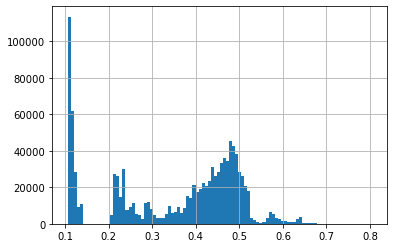

In [9]:
from sklearn import metrics
pred_normal_train = model.predict(x_normal_train)
print(np.sqrt(metrics.mean_squared_error(pred_normal_train,x_normal_train)))


# In[10]:


pred_normal_test = model.predict(x_normal_test)
print(np.sqrt(metrics.mean_squared_error(pred_normal_test,x_normal_test)))


# In[12]:


pred_attack = model.predict(svd_attack)

score_list = []
for index, x in enumerate(pred_attack):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred_attack[index],svd_attack[index])))

attack_df['score'] = score_list


# In[13]:


attack_df['score'].hist(bins = 100)

0.3644051152562114

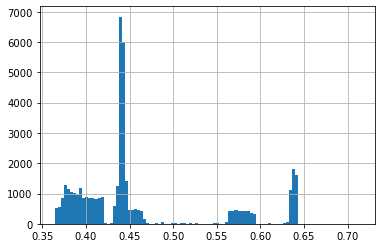

In [10]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']


# In[15]:


nmap_df['score'].hist(bins = 100)


# In[20]:


nmap_df['score'].min()

<AxesSubplot:>

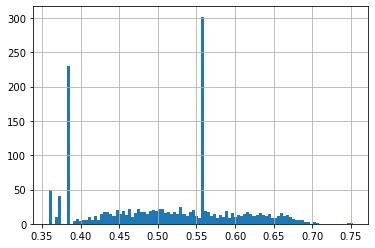

In [11]:

# In[21]:


normal_wordpress = attack_df[attack_df["ip.dst"] == '89.100.107.147']


# In[23]:


normal_wordpress['score'].hist(bins=100)

In [15]:
nmap_df['ip.dst'].value_counts()

89.100.107.148    41824
Name: ip.dst, dtype: int64

In [52]:
new_idea = normal_df.copy(deep = True)
new_idea = normal_df[['timestamp','ip.src', 'ip.dst']]

In [53]:
new_idea['packet'] = 1

/var/folders/x4/thfll6l51jv22hkn1948hhgh0000gn/T/ipykernel_12029/3685194978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_idea['packet'] = 1


In [54]:
new_idea

,timestamp,ip.src,ip.dst,packet
0,1.647531e+09,10.244.0.15,10.244.0.14,1
1,1.647531e+09,10.244.0.15,10.244.0.14,1
2,1.647531e+09,10.244.0.14,10.244.0.15,1
3,1.647531e+09,10.244.0.14,10.244.0.15,1
4,1.647531e+09,10.244.0.14,10.244.0.15,1
...,...,...,...,...
140533,1.647532e+09,10.244.0.9,10.244.0.1,1
140534,1.647532e+09,10.244.0.1,10.244.0.9,1
140535,1.647532e+09,10.244.0.9,10.244.0.1,1
140536,1.647532e+09,10.244.0.1,10.244.0.9,1


In [55]:
from datetime import datetime
new_idea['timestamp'] = new_idea['timestamp'].apply(lambda x:datetime.fromtimestamp(x))
new_idea = new_idea.set_index('timestamp')

/var/folders/x4/thfll6l51jv22hkn1948hhgh0000gn/T/ipykernel_12029/1890510397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_idea['timestamp'] = new_idea['timestamp'].apply(lambda x:datetime.fromtimestamp(x))


In [58]:
new_idea = new_idea.resample('1S').sum()

In [59]:
new_idea['packet'].value_counts()

76     11
86      9
75      8
35      7
109     7
       ..
778     1
796     1
818     1
137     1
936     1
Name: packet, Length: 280, dtype: int64

In [65]:
new_idea['timestamp_utc'] = new_idea.index

In [67]:
new_idea['timestamp_utc'] = new_idea['timestamp_utc'].apply(lambda x: datetime.timestamp(x)) 

In [69]:
new_idea

,packet,timestamp_utc
timestamp,,
2022-03-17 15:37:42,209,1.647531e+09
2022-03-17 15:37:43,72,1.647531e+09
2022-03-17 15:37:44,644,1.647531e+09
2022-03-17 15:37:45,86,1.647531e+09
2022-03-17 15:37:46,560,1.647531e+09
...,...,...
2022-03-17 15:47:36,182,1.647532e+09
2022-03-17 15:47:37,936,1.647532e+09
2022-03-17 15:47:38,92,1.647532e+09


In [88]:
time_list = []
packet_list = list(new_idea['packet'])
big_time_list = list(map(int, list(normal_df['timestamp'])))
utc_list = list(new_idea['timestamp_utc'])

In [95]:
big_packet_list = []
for x in packet_list:
    big_packet_list += [x]*x

In [96]:
len(big_packet_list)

140538